Approach B:
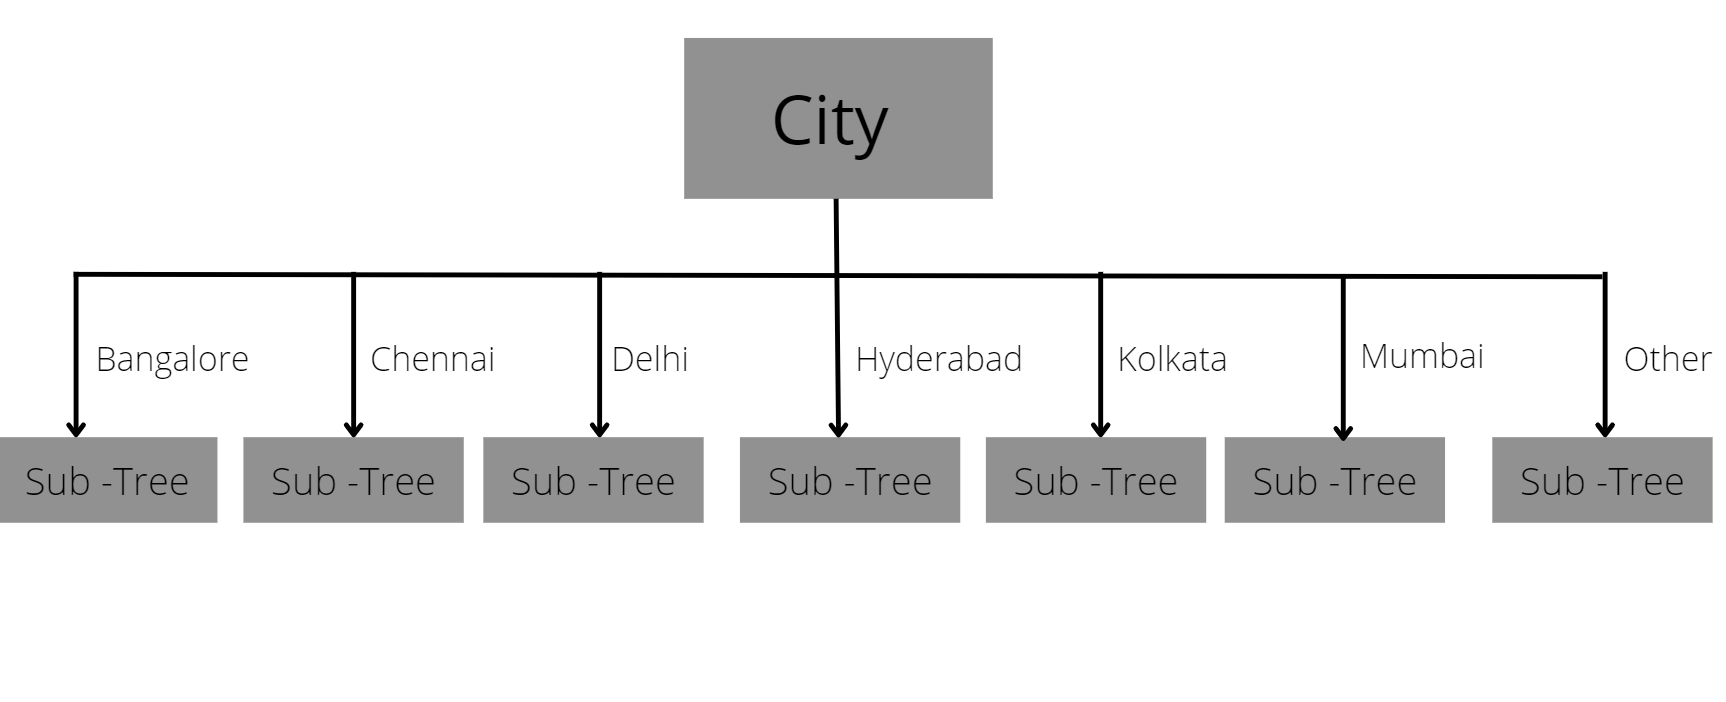

Through this model we ensure that the highest importance is given to the city in which the house is located in. From our analysis we know that the highest importance is given to features which represent city like mumbai, kolkata, etc. This model also considers the fact that a house cannot be in 2 cities at once. for example, any record cannot contain Bangalore=1 and Chennai=1 as well (unless it is a mistake in which case the decision tree will traverse to sub-tree under the 'Other' branch).</br>
So in this approach we divided the training data according to city. We will then train 6 decision trees for all the cities present in the training data. We also train a 7th decision tree on the whole training dataset so that if the test dataset contains a record of a house in a new city(city which is not in training) then the model can still predict for that record.</br>
We then aggregated all our results into a list and then found our mean squared error and R2 score for train data as well as test data.</br>

Link to the drive folder: https://drive.google.com/drive/folders/1t6IG7zAGIDNgaQNLrAoFvepRxSAwpxgW?usp=sharing </br>
Share Notebook: https://colab.research.google.com/drive/1My3X3WBL8g13ekUkVt6MAVcUhF_ZyS1U?usp=sharing

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [ ]:
!pip install eli5

In [ ]:
#importing files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import eli5
from sklearn import tree
from eli5.sklearn import PermutationImportance

In [ ]:
#importing train and test datasets
df_train = pd.read_csv('/content/drive/MyDrive/DS_2_project_models/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DS_2_project_models/test.csv')
rs = 12

####Our Model

In [ ]:
#dropping unnecessary column
df_train.drop("Unnamed: 0",axis=1,inplace=True)
df_test.drop("Unnamed: 0",axis=1,inplace=True)

#dividing the training data into cities 
df_Banglore_train = df_train[df_train['Bangalore']==1]
df_Chennai_train = df_train[df_train['Chennai']==1]
df_Delhi_train = df_train[df_train['Delhi']==1]
df_Hyderabad_train = df_train[df_train['Hyderabad']==1]
df_Kolkata_train = df_train[df_train['Kolkata']==1]
df_Mumbai_train = df_train[df_train['Mumbai']==1]

#dividing the whole dataset between X_train and y_train
X_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']

In [ ]:
#Defining a function fit_city_dt which takes training data and returns a decision tree, standardscaler object and scaled X_train
def fit_city_dt(df_train):
  X_train = df_train.drop(["Price"],axis=1)
  y_train = df_train['Price']
  scaler = StandardScaler()
  X_train_std = scaler.fit_transform(X_train)
  dt = DecisionTreeRegressor(random_state=11)
  params_dt = {
      'max_depth' : np.arange(1,100)
  }
  grid_dt = GridSearchCV(estimator=dt,scoring='neg_mean_squared_error',param_grid=params_dt,cv=5)
  grid_dt.fit(X_train_std,y_train)

  #Finding the permutation importance for each decision tree after dropping cities from the dataset
  perm = PermutationImportance(grid_dt, n_iter=10)
  perm.fit(X_train,y_train)
  
  return (grid_dt.best_estimator_,scaler,X_train_std,perm)

In [ ]:
#creating dictionaries of decision trees, scaler object and scaled X_train for each city
dt = {}
sc = {}
scaled_train = {}
perm = {}
dt['Bangalore'],sc['Bangalore'],scaled_train['Bangalore'],perm['Bangalore'] = fit_city_dt(df_Banglore_train)
dt['Chennai'],sc['Chennai'],scaled_train['Chennai'],perm['Chennai'] = fit_city_dt(df_Chennai_train)
dt['Delhi'],sc['Delhi'],scaled_train['Delhi'],perm['Delhi'] = fit_city_dt(df_Delhi_train)
dt['Hyderabad'],sc['Hyderabad'],scaled_train['Hyderabad'],perm['Hyderabad'] = fit_city_dt(df_Hyderabad_train)
dt['Kolkata'],sc['Kolkata'],scaled_train['Kolkata'],perm['Kolkata'] = fit_city_dt(df_Kolkata_train)
dt['Mumbai'],sc['Mumbai'],scaled_train['Mumbai'],perm['Mumbai'] = fit_city_dt(df_Mumbai_train)
dt['Other'],sc['Other'],scaled_train['Other'],perm['Other'] = fit_city_dt(df_train)

In [ ]:
# categorizing test data into various cities We are storing the indexes in a dictionary with key as city name
X_test = df_test.drop('Price',axis=1)
y_test = df_test['Price']
city_ind = {}
city_ind['Banglore'] = []
city_ind['Chennai'] = []
city_ind['Delhi'] = []
city_ind['Hyderabad'] = []
city_ind['Kolkata'] = []
city_ind['Mumbai'] = []
city_ind['Other'] = []
for i in range(X_test.shape[0]):
  if X_test.iloc[i]['Bangalore'] == 1 and X_test.iloc[i]['Chennai'] == 0 and X_test.iloc[i]['Delhi'] == 0 and X_test.iloc[i]['Hyderabad'] == 0 and X_test.iloc[i]['Kolkata'] == 0 and X_test.iloc[i]['Mumbai'] == 0:
    city_ind['Banglore'].append(i)
  elif X_test.iloc[i]['Bangalore'] == 0 and X_test.iloc[i]['Chennai'] == 1 and X_test.iloc[i]['Delhi'] == 0 and X_test.iloc[i]['Hyderabad'] == 0 and X_test.iloc[i]['Kolkata'] == 0 and X_test.iloc[i]['Mumbai'] == 0:
    city_ind['Chennai'].append(i)
  elif X_test.iloc[i]['Bangalore'] == 0 and X_test.iloc[i]['Chennai'] == 0 and X_test.iloc[i]['Delhi'] == 1 and X_test.iloc[i]['Hyderabad'] == 0 and X_test.iloc[i]['Kolkata'] == 0 and X_test.iloc[i]['Mumbai'] == 0:
    city_ind['Delhi'].append(i)
  elif X_test.iloc[i]['Bangalore'] == 0 and X_test.iloc[i]['Chennai'] == 0 and X_test.iloc[i]['Delhi'] == 0 and X_test.iloc[i]['Hyderabad'] == 1 and X_test.iloc[i]['Kolkata'] == 0 and X_test.iloc[i]['Mumbai'] == 0:
    city_ind['Hyderabad'].append(i)
  elif X_test.iloc[i]['Bangalore'] == 0 and X_test.iloc[i]['Chennai'] == 0 and X_test.iloc[i]['Delhi'] == 0 and X_test.iloc[i]['Hyderabad'] == 0 and X_test.iloc[i]['Kolkata'] == 1 and X_test.iloc[i]['Mumbai'] == 0:
    city_ind['Kolkata'].append(i)
  elif X_test.iloc[i]['Bangalore'] == 0 and X_test.iloc[i]['Chennai'] == 0 and X_test.iloc[i]['Delhi'] == 0 and X_test.iloc[i]['Hyderabad'] == 0 and X_test.iloc[i]['Kolkata'] == 0 and X_test.iloc[i]['Mumbai'] == 1:
    city_ind['Mumbai'].append(i)
  else:
    city_ind['Other'].append(i)

In [ ]:
# defining a function pred which will predict on the train data and return a list y_train_pred
def pred(X_train):

  #predicting
  if len(city_ind['Banglore'])>0 : y_train_Banglore_pred = dt['Bangalore'].predict(scaled_train['Bangalore'])
  if len(city_ind['Chennai'])>0 : y_train_Chennai_pred = dt['Chennai'].predict(scaled_train['Chennai'])
  if len(city_ind['Delhi'])>0 : y_train_Delhi_pred = dt['Delhi'].predict(scaled_train['Delhi'])
  if len(city_ind['Hyderabad'])>0 : y_train_Hyderabad_pred = dt['Hyderabad'].predict(scaled_train['Hyderabad'])
  if len(city_ind['Kolkata'])>0 : y_train_Kolkata_pred = dt['Kolkata'].predict(scaled_train['Kolkata'])
  if len(city_ind['Mumbai'])>0 : y_train_Mumbai_pred = dt['Mumbai'].predict(scaled_train['Mumbai'])
  if len(city_ind['Other'])>0 : y_train_Other_pred = dt['Other'].predict(scaled_train['Other'])

  #creating y_pred_train
  y_pred_train = ['a']*X_train.shape[0]
  ptr_Banglore = 0
  ptr_Chennai = 0
  ptr_Delhi = 0
  ptr_Hyderabad = 0
  ptr_Kolkata = 0
  ptr_Mumbai = 0
  ptr_Other = 0
  for i in range(len(X_train)):
    if i in df_Banglore_train.index:
      y_pred_train[i] = y_train_Banglore_pred[ptr_Banglore]
      ptr_Banglore = ptr_Banglore + 1
    elif i in df_Chennai_train.index:
      y_pred_train[i] = y_train_Chennai_pred[ptr_Chennai]
      ptr_Chennai = ptr_Chennai + 1
    elif i in df_Delhi_train.index:
      y_pred_train[i] = y_train_Delhi_pred[ptr_Delhi]
      ptr_Delhi = ptr_Delhi + 1
    elif i in df_Hyderabad_train.index:
      y_pred_train[i] = y_train_Hyderabad_pred[ptr_Hyderabad]
      ptr_Hyderabad = ptr_Hyderabad + 1
    elif i in df_Kolkata_train.index:
      y_pred_train[i] = y_train_Kolkata_pred[ptr_Kolkata]
      ptr_Kolkata = ptr_Kolkata + 1
    elif i in df_Mumbai_train.index:
      y_pred_train[i] = y_train_Mumbai_pred[ptr_Mumbai]
      ptr_Mumbai = ptr_Mumbai + 1
    else:
      y_pred[i] = y_train_Other_pred[ptr_Other]
      ptr_Other = ptr_Other + 1
  return y_pred_train

In [ ]:
#defining a function scale_pred which first scales the data according to the city and then predicts on the scaled data. This function returns a list y_pred
def scale_pred(X_test):
  #scaling data
  if len(city_ind['Banglore'])>0 : X_test_Banglore_std = sc['Bangalore'].transform(X_test.loc[city_ind['Banglore']])
  if len(city_ind['Chennai'])>0 : X_test_Chennai_std = sc['Chennai'].transform(X_test.loc[city_ind['Chennai']])
  if len(city_ind['Delhi'])>0 : X_test_Delhi_std = sc['Delhi'].transform(X_test.loc[city_ind['Delhi']])
  if len(city_ind['Hyderabad'])>0 : X_test_Hyderabad_std = sc['Hyderabad'].transform(X_test.loc[city_ind['Hyderabad']])
  if len(city_ind['Kolkata'])>0 : X_test_Kolkata_std = sc['Kolkata'].transform(X_test.loc[city_ind['Kolkata']])
  if len(city_ind['Mumbai'])>0 : X_test_Mumbai_std = sc['Mumbai'].transform(X_test.loc[city_ind['Mumbai']])
  if len(city_ind['Other'])>0 : X_test_Other_std = sc['Other'].transform(X_test.loc[city_ind['Other']])

  #predicting
  if len(city_ind['Banglore'])>0 : X_test_Banglore_pred = dt['Bangalore'].predict(X_test_Banglore_std)
  if len(city_ind['Chennai'])>0 : X_test_Chennai_pred = dt['Chennai'].predict(X_test_Chennai_std)
  if len(city_ind['Delhi'])>0 : X_test_Delhi_pred = dt['Delhi'].predict(X_test_Delhi_std)
  if len(city_ind['Hyderabad'])>0 : X_test_Hyderabad_pred = dt['Hyderabad'].predict(X_test_Hyderabad_std)
  if len(city_ind['Kolkata'])>0 : X_test_Kolkata_pred = dt['Kolkata'].predict(X_test_Kolkata_std)
  if len(city_ind['Mumbai'])>0 : X_test_Mumbai_pred = dt['Mumbai'].predict(X_test_Mumbai_std)
  if len(city_ind['Other'])>0 : X_test_Other_pred = dt['Other'].predict(X_test_Other_std)

  #creating y_pred
  X_test_std = ['a']*X_test.shape[0]
  y_pred = ['a']*X_test.shape[0]
  ptr_Banglore = 0
  ptr_Chennai = 0
  ptr_Delhi = 0
  ptr_Hyderabad = 0
  ptr_Kolkata = 0
  ptr_Mumbai = 0
  ptr_Other = 0
  for i in range(len(X_test)):
    if i in city_ind['Banglore']:
      X_test_std[i] = X_test_Banglore_std[ptr_Banglore]
      y_pred[i] = X_test_Banglore_pred[ptr_Banglore]
      ptr_Banglore = ptr_Banglore + 1
    elif i in city_ind['Chennai']:
      X_test_std[i] = X_test_Chennai_std[ptr_Chennai]
      y_pred[i] = X_test_Chennai_pred[ptr_Chennai]
      ptr_Chennai = ptr_Chennai + 1
    elif i in city_ind['Delhi']:
      X_test_std[i] = X_test_Delhi_std[ptr_Delhi]
      y_pred[i] = X_test_Delhi_pred[ptr_Delhi]
      ptr_Delhi = ptr_Delhi + 1
    elif i in city_ind['Hyderabad']:
      X_test_std[i] = X_test_Hyderabad_std[ptr_Hyderabad]
      y_pred[i] = X_test_Hyderabad_pred[ptr_Hyderabad]
      ptr_Hyderabad = ptr_Hyderabad + 1
    elif i in city_ind['Kolkata']:
      X_test_std[i] = X_test_Kolkata_std[ptr_Kolkata]
      y_pred[i] = X_test_Kolkata_pred[ptr_Kolkata]
      ptr_Kolkata = ptr_Kolkata + 1
    elif i in city_ind['Mumbai']:
      X_test_std[i] = X_test_Mumbai_std[ptr_Mumbai]
      y_pred[i] = X_test_Mumbai_pred[ptr_Mumbai]
      ptr_Mumbai = ptr_Mumbai + 1
    else:
      X_test_std[i] = X_test_Other_std[ptr_Other]
      y_pred[i] = X_test_Other_pred[ptr_Other]
      ptr_Other = ptr_Other + 1
  return y_pred

In [ ]:
# Having a look at our final results.
y_pred = scale_pred(X_test)
y_pred_train = pred(X_train)

print("The Mean Squared Error for our Model on training data is : ",round(mean_squared_error(y_train,y_pred_train),2))
print("The R2 Score for our Model on test data is : ",round(r2_score(y_train,y_pred_train),2))
print()

print("The Mean Squared Error for our Model on train data is : ",round(mean_squared_error(y_test,y_pred),2))
print("The R2 Score for our Model on test data is : ",round(r2_score(y_test,y_pred),2))

The Mean Squared Error for our Model on training data is :  0.42
The R2 Score for our Model on test data is :  0.38

The Mean Squared Error for our Model on train data is :  0.45
The R2 Score for our Model on test data is :  0.33


####Feature Importance and permutation Importance

In [ ]:
eli5.show_weights(perm['Bangalore'], feature_names=X_train.columns.tolist())

In [ ]:
print("Top 10 features for Bangalore")
print()
for i in X_train.columns[np.flip(np.argsort(dt['Bangalore'].feature_importances_))][:10]:
  print(i)

Top 10 features for Bangalore

Area
JoggingTrack
Intercom
No. of Bedrooms
Resale
Gasconnection
VaastuCompliant
LiftAvailable
SwimmingPool
IndoorGames


In [ ]:
eli5.show_weights(perm['Chennai'], feature_names=X_train.columns.tolist())

In [ ]:
print("Top 10 features for Chennai")
print()
for i in X_train.columns[np.flip(np.argsort(dt['Chennai'].feature_importances_))][:10]:
  print(i)

Top 10 features for Chennai

Area
CarParking
24X7Security
LiftAvailable
Children'splayarea
IndoorGames
VaastuCompliant
ClubHouse
No. of Bedrooms
DiningTable


In [ ]:
eli5.show_weights(perm['Delhi'], feature_names=X_train.columns.tolist())

In [ ]:
print("Top 10 features for Delhi")
print()
for i in X_train.columns[np.flip(np.argsort(dt['Delhi'].feature_importances_))][:10]:
  print(i)

Top 10 features for Delhi

Area
No. of Bedrooms
Resale
Children'splayarea
LiftAvailable
Gasconnection
CarParking
24X7Security
SportsFacility
PowerBackup


In [ ]:
eli5.show_weights(perm['Hyderabad'], feature_names=X_train.columns.tolist())

In [ ]:
print("Top 10 features for Hyderabad")
print()
for i in X_train.columns[np.flip(np.argsort(dt['Hyderabad'].feature_importances_))][:10]:
  print(i)

Top 10 features for Hyderabad

Area
SwimmingPool
No. of Bedrooms
LandscapedGardens
IndoorGames
Intercom
Resale
ClubHouse
Cafeteria
StaffQuarter


In [ ]:
eli5.show_weights(perm['Kolkata'], feature_names=X_train.columns.tolist())

In [ ]:
print("Top 10 features for Kolkata")
print()
for i in X_train.columns[np.flip(np.argsort(dt['Kolkata'].feature_importances_))][:10]:
  print(i)

Top 10 features for Kolkata

Area
No. of Bedrooms
Resale
LandscapedGardens
SportsFacility
Cafeteria
StaffQuarter
CarParking
PowerBackup
24X7Security


In [ ]:
eli5.show_weights(perm['Mumbai'], feature_names=X_train.columns.tolist())

In [ ]:
print("Top 10 features for Mumbai")
print()
for i in X_train.columns[np.flip(np.argsort(dt['Mumbai'].feature_importances_))][:10]:
  print(i)

Top 10 features for Mumbai

No. of Bedrooms
Area
CarParking
RainWaterHarvesting
Resale
Gasconnection
Intercom
AC
BED
LiftAvailable


In [ ]:
eli5.show_weights(perm['Other'], feature_names=X_train.columns.tolist())

In [ ]:
print("Top 10 features for Other")
print()
for i in X_train.columns[np.flip(np.argsort(dt['Other'].feature_importances_))][:10]:
  print(i)

Top 10 features for Other

Area
Mumbai
No. of Bedrooms
Delhi
Kolkata
Resale
CarParking
Intercom
LiftAvailable
JoggingTrack
